# Continuous Control

---

[//]: # (Image References)

[image1]: https://user-images.githubusercontent.com/10624937/43851024-320ba930-9aff-11e8-8493-ee547c6af349.gif "Trained Agent"
[image2]: https://user-images.githubusercontent.com/10624937/43851646-d899bf20-9b00-11e8-858c-29b5c2c94ccc.png "Crawler"


### Introduction

For this project, you will work with the [Reacher](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Learning-Environment-Examples.md#reacher) environment.

![Trained Agent][image1]

In this environment, a double-jointed arm can move to target locations. A reward of +0.1 is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of 33 variables corresponding to position, rotation, velocity, and angular velocities of the arm. Each action is a vector with four numbers, corresponding to torque applicable to two joints. Every entry in the action vector should be a number between -1 and 1.

### Distributed Training

For this project, the environment contains 20 identical agents, each with its own copy of the environment.  

This environment is useful for algorithms like [PPO](https://arxiv.org/pdf/1707.06347.pdf), [A3C](https://arxiv.org/pdf/1602.01783.pdf), and [D4PG](https://openreview.net/pdf?id=SyZipzbCb) that use multiple (non-interacting, parallel) copies of the same agent to distribute the task of gathering experience.  

### Solving the Environment

The barrier for solving the environment takes into account the presence of many agents.  In particular, your agents must get an average score of +30 (over 100 consecutive episodes, and over all agents).  Specifically,
- After each episode, we add up the rewards that each agent received (without discounting), to get a score for each agent.  This yields 20 (potentially different) scores.  We then take the average of these 20 scores. 
- This yields an **average score** for each episode (where the average is over all 20 agents).

The environment is considered solved, when the average (over 100 episodes) of those average scores is at least +30. 

### Getting Started

1. Download the environment from one of the links below.  You need only select the environment that matches your operating system:

        - Linux: [click here](https://s3-us-west-1.amazonaws.com/udacity-drlnd/P2/Reacher/Reacher_Linux.zip)
        - Mac OSX: [click here](https://s3-us-west-1.amazonaws.com/udacity-drlnd/P2/Reacher/Reacher.app.zip)
        - Windows (32-bit): [click here](https://s3-us-west-1.amazonaws.com/udacity-drlnd/P2/Reacher/Reacher_Windows_x86.zip)
        - Windows (64-bit): [click here](https://s3-us-west-1.amazonaws.com/udacity-drlnd/P2/Reacher/Reacher_Windows_x86_64.zip)
    
    (_For Windows users_) Check out [this link](https://support.microsoft.com/en-us/help/827218/how-to-determine-whether-a-computer-is-running-a-32-bit-version-or-64) if you need help with determining if your computer is running a 32-bit version or 64-bit version of the Windows operating system.

    (_For AWS_) If you'd like to train the agent on AWS (and have not [enabled a virtual screen](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Training-on-Amazon-Web-Service.md)), then please use [this link](https://s3-us-west-1.amazonaws.com/udacity-drlnd/P2/Reacher/one_agent/Reacher_Linux_NoVis.zip) (version 1) or [this link](https://s3-us-west-1.amazonaws.com/udacity-drlnd/P2/Reacher/Reacher_Linux_NoVis.zip) (version 2) to obtain the "headless" version of the environment.  You will **not** be able to watch the agent without enabling a virtual screen, but you will be able to train the agent.  (_To watch the agent, you should follow the instructions to [enable a virtual screen](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Training-on-Amazon-Web-Service.md), and then download the environment for the **Linux** operating system above._)

2. Place the file in the DRLND GitHub repository, in the `p2_continuous-control/` folder, and unzip (or decompress) the file. 




### Introduction

I used the DDPG algorithm. We used similar arthitectures for the actor and critic agents. Both have 4 hidden layers. Hyperparameters are given below:

In [ ]:
fc1_units=128           # width for the 1st hidden layer
fc2_units=64            # width for the 2nd hidden layer
fc3_units=64            # width for the 3rd hidden layer
fc4_units=16            # width for the 4th hidden layer

BUFFER_SIZE = int(1e6)  # replay buffer size
BATCH_SIZE = 128        # minibatch size
GAMMA = 0.99            # discount factor
TAU = 1e-3              # for soft update of target parameters
LR_ACTOR = 1e-3         # learning rate of the actor 
LR_CRITIC = 1e-3        # learning rate of the critic
WEIGHT_DECAY = 0.0000   # L2 weight decay
theta = 0.15            # theta for ON noise
sigma = 0.2             # sigma for ON noise

During the project, I noticed that the agent performances improve as the number of layers and widths of each layer increases. 

In [8]:
# Scores during training process
agent = Agent(state_size=33, action_size=4, random_seed=10)
scores = []
ddpg(scores)

Episode 2	Average Score: 0.71	Score: 0.64
Episode 4	Average Score: 0.74	Score: 0.99
Episode 6	Average Score: 0.94	Score: 1.40
Episode 8	Average Score: 1.12	Score: 1.53
Episode 10	Average Score: 1.27	Score: 1.72
Episode 12	Average Score: 1.62	Score: 3.90
Episode 14	Average Score: 2.02	Score: 4.61
Episode 16	Average Score: 2.41	Score: 5.55
Episode 18	Average Score: 2.92	Score: 7.06
Episode 20	Average Score: 3.46	Score: 8.55
Episode 22	Average Score: 4.38	Score: 13.61
Episode 24	Average Score: 5.75	Score: 23.54
Episode 26	Average Score: 7.49	Score: 30.97
Episode 28	Average Score: 9.18	Score: 33.51
Episode 30	Average Score: 10.77	Score: 33.22
Episode 32	Average Score: 12.22	Score: 34.35
Episode 34	Average Score: 13.64	Score: 35.83
Episode 36	Average Score: 14.96	Score: 37.08
Episode 38	Average Score: 16.16	Score: 37.82
Episode 40	Average Score: 17.22	Score: 37.77
Episode 42	Average Score: 18.19	Score: 37.84
Episode 44	Average Score: 19.08	Score: 37.21
Episode 46	Average Score: 19.86	Score:

KeyboardInterrupt: 

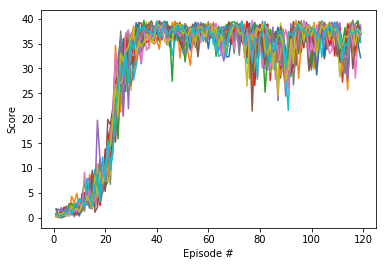

In [10]:
# Scores for all agents.
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

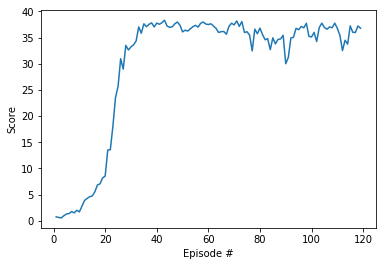

In [12]:
# Average score for all 20 agents.
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), np.mean(scores, axis = 1))
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### Future improvements

We can try the Trust Region Policy Optimization (TRPO), Truncated Natural Policy Gradient (TNPG), and Distributed Distributional Deterministic Policy Gradients (D4PG) algorithms. 